In [2]:
# sales_forecast.ipynb

# 1. Imports
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 2. Connect to DuckDB
con = duckdb.connect(database='../data/dev.duckdb', read_only=False)

In [5]:
# 3. Preview tables
print("Available tables:")
tables = con.execute("SHOW TABLES").fetchall()
for t in tables:
    print("-", t[0])

Available tables:
- dim_customers
- dim_products
- fct_sales
- sales_data
- stg_sales


In [6]:
# 4. Load fact and dimension tables
fct_sales = con.execute("SELECT * FROM fct_sales").fetchdf()
dim_customers = con.execute("SELECT * FROM dim_customers").fetchdf()
dim_products = con.execute("SELECT * FROM dim_products").fetchdf()

In [7]:
# 5. Quick aggregation: total sales per month
fct_sales['sale_date'] = pd.to_datetime(fct_sales['sale_date'])
sales_monthly = fct_sales.groupby(fct_sales['sale_date'].dt.to_period('M'))['sales_amount'].sum()
sales_monthly = sales_monthly.reset_index()
sales_monthly['sale_date'] = sales_monthly['sale_date'].dt.to_timestamp()

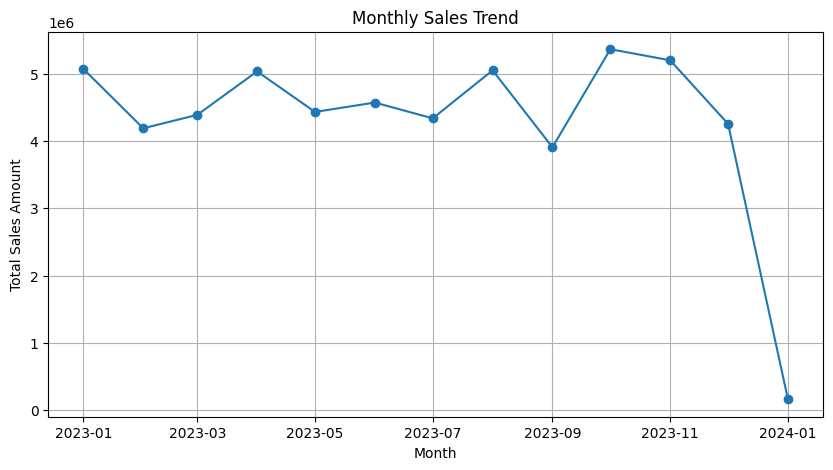

In [8]:
# 6. Plot sales trend
plt.figure(figsize=(10,5))
plt.plot(sales_monthly['sale_date'], sales_monthly['sales_amount'], marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.grid(True)
plt.show()

In [9]:
# 7. Minimal forecasting example (next 3 months using rolling mean)
sales_monthly['forecast'] = sales_monthly['sales_amount'].rolling(3).mean().shift(1)
print(sales_monthly.tail())

    sale_date  sales_amount      forecast
8  2023-09-01    3906460.31  4.652977e+06
9  2023-10-01    5364428.03  4.431251e+06
10 2023-11-01    5200207.76  4.773946e+06
11 2023-12-01    4254426.76  4.823699e+06
12 2024-01-01     160833.08  4.939688e+06
